λ (Price impact): 0.032
β (Insider intensity): 15.811
Mean squared error between price and value: 5.3454


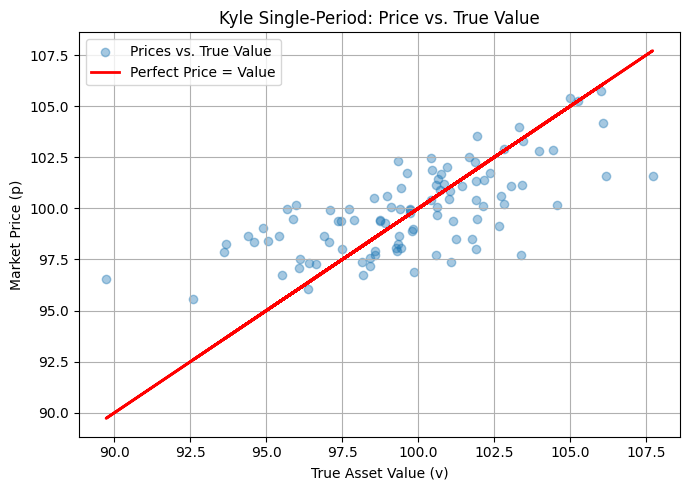

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# initial parameters
Sigma0 = 10        # Prior std. dev of v
sigma_u = 50       # Std. dev. of noise trader demand
p0 = 100            # Prior mean of asset value
n = 100            # Number of simulated trades

# Kyle equilibrium
lambda_kyle = np.sqrt(Sigma0) / (2 * sigma_u)
beta_kyle = sigma_u / np.sqrt(Sigma0)

# Simulating true asset values and noise
v = np.random.normal(loc=p0, scale=np.sqrt(Sigma0), size=n)
u = np.random.normal(loc=0, scale=sigma_u, size=n)

# Insider order
x = beta_kyle * (v - p0)

# Total order flow
y = x + u

# Market price
p = p0 + lambda_kyle * y

# === Analysis ===
# Price error
error = p - v
mse = np.mean(error**2)

print(f"λ (Price impact): {lambda_kyle:.3f}")
print(f"β (Insider intensity): {beta_kyle:.3f}")
print(f"Mean squared error between price and value: {mse:.4f}")

# === Plot ===

plt.figure(figsize=(7, 5))
plt.scatter(v, p, alpha=0.4, label="Prices vs. True Value")
plt.plot(v, v, color='red', label="Perfect Price = Value", linewidth=2)
plt.xlabel("True Asset Value (v)")
plt.ylabel("Market Price (p)")
plt.title("Kyle Single-Period: Price vs. True Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


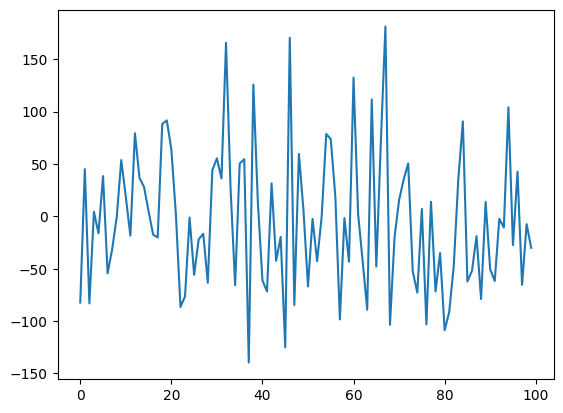

In [12]:
# plot of simulated y (total order flow)
plt.plot(y)

Kyle Model Simulation Results:
   Total Order Flow (y)   Price (p)
0            -82.347316   97.395949
1             45.054035  101.424734
2            -83.086881   97.372562
3              4.362682  100.137960
4            -16.121657   99.490188


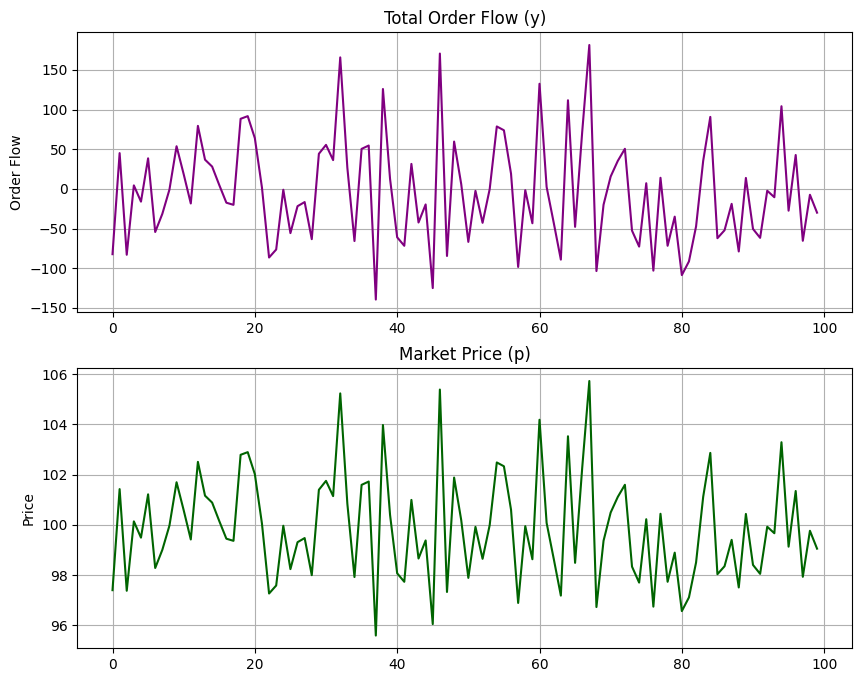

In [13]:
# price and total order flow
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
axes[0].plot(y, label="Total Order Flow (y)", color='purple')
axes[0].set_title("Total Order Flow (y)")
axes[0].set_ylabel("Order Flow")
axes[0].grid(True)

axes[1].plot(p, label="Market Price (p)", color='darkgreen')
axes[1].set_title("Market Price (p)")
axes[1].set_ylabel("Price")
axes[1].grid(True)



results_kyle = pd.DataFrame({
    'Total Order Flow (y)': y,
    'Price (p)': p
})
print("Kyle Model Simulation Results:")
print(results_kyle.head())

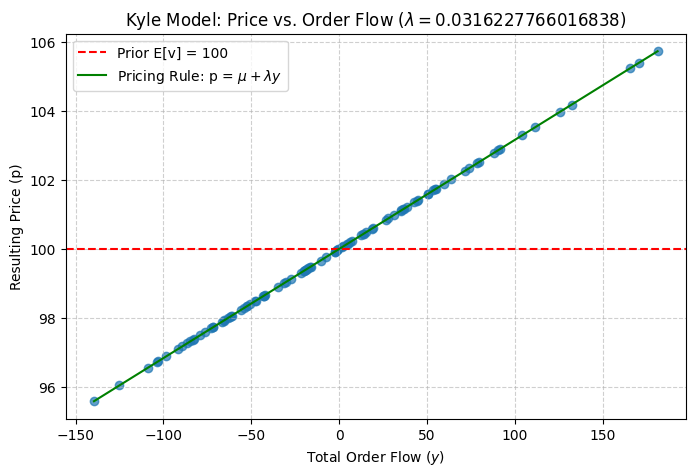

In [14]:
# price and total order flow
plt.figure(figsize=(8, 5))
plt.scatter(results_kyle['Total Order Flow (y)'], results_kyle['Price (p)'], alpha=0.7)
plt.axhline(p0, color='red', linestyle='--', label=f'Prior E[v] = {p0}')
plt.xlabel('Total Order Flow ($y$)')
plt.ylabel('Resulting Price (p)')
plt.title(f'Kyle Model: Price vs. Order Flow ($\lambda = {lambda_kyle}$)')
# Plot the pricing rule line
omega_range = np.linspace(results_kyle['Total Order Flow (y)'].min(), results_kyle['Total Order Flow (y)'].max(), 50)
price_line = p0 + lambda_kyle * omega_range
plt.plot(omega_range, price_line, color='green', label='Pricing Rule: p = $\mu + \lambda y$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

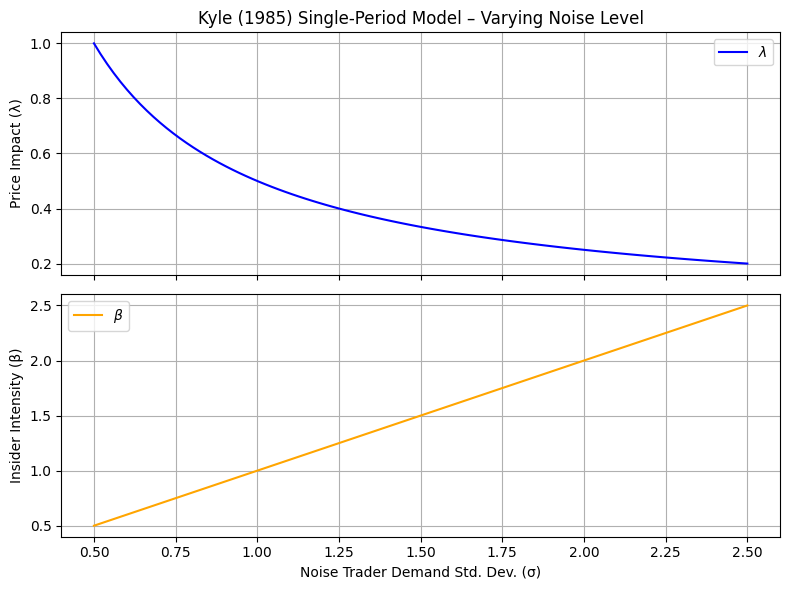

In [15]:
### Evolution of lambda and beta with noise level (single-period)
### Fixed Σ₀ = 1

Sigma0 = 1.0
sigma_u_values = np.linspace(0.5, 2.5, 100)

# Compute lambda and beta for each sigma_u
lambda_vals = np.sqrt(Sigma0) / (2 * sigma_u_values)
beta_vals = sigma_u_values / np.sqrt(Sigma0)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# λ vs σ
axs[0].plot(sigma_u_values, lambda_vals, color='blue', label=r'$\lambda$')
axs[0].set_ylabel('Price Impact (λ)')
axs[0].grid(True)
axs[0].legend()
axs[0].set_title('Kyle (1985) Single-Period Model – Varying Noise Level')

# β vs σ
axs[1].plot(sigma_u_values, beta_vals, color='orange', label=r'$\beta$')
axs[1].set_xlabel('Noise Trader Demand Std. Dev. (σ)')
axs[1].set_ylabel('Insider Intensity (β)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


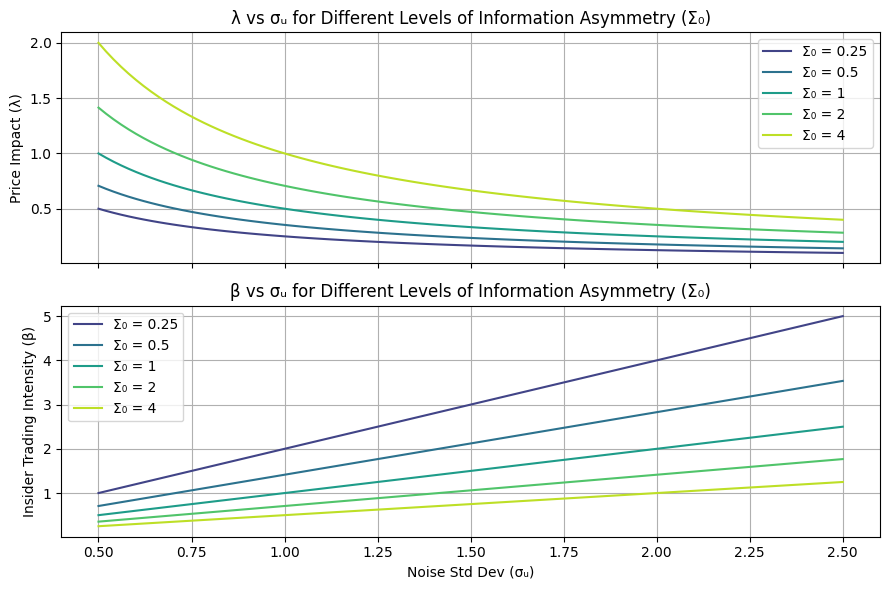

In [16]:
### Varying Σ₀ and σ_u
# Range of σ_u values (noise levels)
sigma_u_vals = np.linspace(0.5, 2.5, 100)

# Varying Σ₀ (info asymmetry levels)
Sigma0_vals = [0.25, 0.5, 1, 2, 4]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(Sigma0_vals)))

# subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# λ plots
for i, Sigma0 in enumerate(Sigma0_vals):
    lambda_vals = np.sqrt(Sigma0) / (2 * sigma_u_vals)
    axs[0].plot(sigma_u_vals, lambda_vals, label=f"Σ₀ = {Sigma0}", color=colors[i])

axs[0].set_ylabel("Price Impact (λ)")
axs[0].set_title("λ vs σᵤ for Different Levels of Information Asymmetry (Σ₀)")
axs[0].legend()
axs[0].grid(True)

# β plots
for i, Sigma0 in enumerate(Sigma0_vals):
    beta_vals = sigma_u_vals / np.sqrt(Sigma0)
    axs[1].plot(sigma_u_vals, beta_vals, label=f"Σ₀ = {Sigma0}", color=colors[i])

axs[1].set_ylabel("Insider Trading Intensity (β)")
axs[1].set_xlabel("Noise Std Dev (σᵤ)")
axs[1].set_title("β vs σᵤ for Different Levels of Information Asymmetry (Σ₀)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


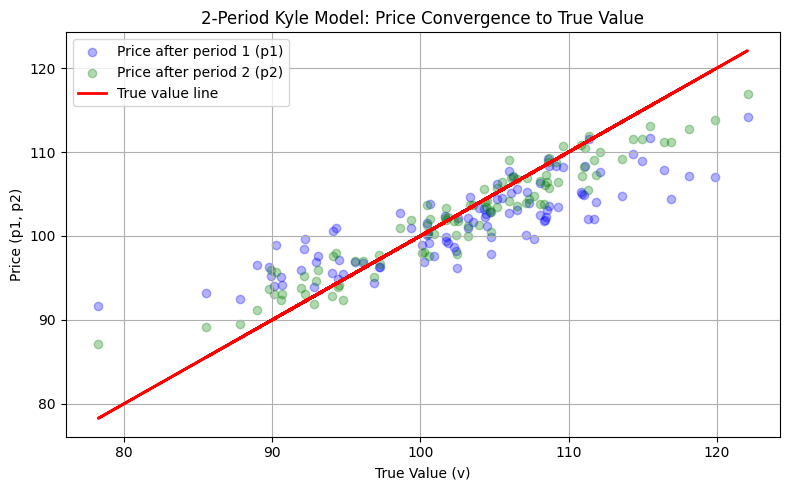

            Stage  MSE (p - v)  Price impact λ  Insider intensity β
0  After period 1    25.239056        0.054772             9.128709
1  After period 2     7.958218        0.027386            18.257419


In [17]:
### 2-Period Kyle Model
# Parameters
Sigma0 = 10           # Prior std dev of v
sigma_u = 50          # Std dev of noise trader demand
p0 = 100.0               # Prior mean of asset value
n = 100               # Number of simulated agents (trials)

# Equilibrium parameters
beta_0 = sigma_u / np.sqrt(3 * Sigma0)
lambda_0 = np.sqrt(3 * Sigma0) / (2 * sigma_u)

Sigma1 = (3 / 4) * Sigma0
beta_1 = sigma_u / np.sqrt(Sigma1)  # Equivalent to 2 * sigma_u / sqrt(3 * Sigma0)
lambda_1 = np.sqrt(Sigma1) / (2 * sigma_u)

# Simulate true asset values and noise
v = np.random.normal(loc=p0, scale=Sigma0, size=n)
u0 = np.random.normal(loc=0, scale=sigma_u, size=n)
u1 = np.random.normal(loc=0, scale=sigma_u, size=n)

# Period 0
x0 = beta_0 * (v - p0)
y0 = x0 + u0
p1 = p0 + lambda_0 * y0

# Period 1
x1 = beta_1 * (v - p1)
y1 = x1 + u1
p2 = p1 + lambda_1 * y1

# Evaluate errors
errors_p1 = p1 - v
errors_p2 = p2 - v
mse_p1 = np.mean(errors_p1**2)
mse_p2 = np.mean(errors_p2**2)

# how well prices reflect v after period 1 and period 2
plt.figure(figsize=(8, 5))
plt.scatter(v, p1, alpha=0.3, label="Price after period 1 (p1)", color='blue')
plt.scatter(v, p2, alpha=0.3, label="Price after period 2 (p2)", color='green')
plt.plot(v, v, color='red', linewidth=2, label="True value line")
plt.xlabel("True Value (v)")
plt.ylabel("Price (p1, p2)")
plt.title("2-Period Kyle Model: Price Convergence to True Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# summary table
summary_df = pd.DataFrame({
    "Stage": ["After period 1", "After period 2"],
    "MSE (p - v)": [mse_p1, mse_p2],
    "Price impact λ": [lambda_0, lambda_1],
    "Insider intensity β": [beta_0, beta_1]
})

print(summary_df)


In [18]:
### Adjustment function
y = []
def price_adj_function(y, lambda_kyle):
    return lambda_kyle * np.sign(y) * np.log1p(abs(y))  # logarithmic adjustment

# not sensitive to large orders -> ignores order size noise 
# avoids large price swings



In [19]:
v = np.random.normal(loc=p0, scale= Sigma0)
mm_quotes = [(99, 101)]
y = []
iterations = 50
for i in range(iterations):
    midprice = (mm_quotes[-1][0] + mm_quotes[-1][1])/2
    uninformed_trader_of = np.random.normal(0, 1)
    informed_trader_of = (v - midprice)
    y_total = uninformed_trader_of + informed_trader_of

    last_bid = mm_quotes[-1][0]
    last_ask = mm_quotes[-1][1]
    price_adjustment = price_adj_function(y_total, lambda_kyle)

    new_bid, new_ask = last_bid + price_adjustment, last_ask + price_adjustment
    y.append(y_total)
    mm_quotes.append((new_bid, new_ask))

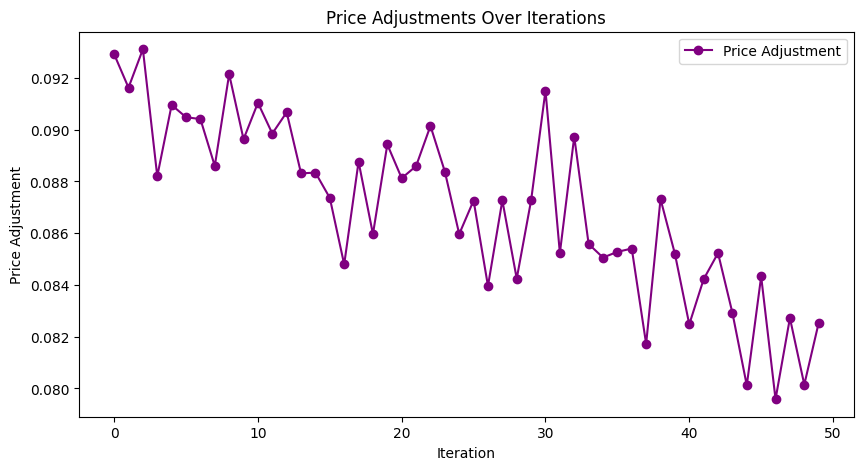

In [20]:
# price adjustments at each step
price_adjustments = [mm_quotes[i+1][0] - mm_quotes[i][0] for i in range(len(mm_quotes)-1)]

# Plot price adjustments over iterations
plt.figure(figsize=(10, 5))
plt.plot(price_adjustments, marker='o', linestyle='-', color='purple', label="Price Adjustment")
plt.xlabel("Iteration")
plt.ylabel("Price Adjustment")
plt.title("Price Adjustments Over Iterations")
plt.legend()
plt.show()


## Dynamic Kyle Model – 2-Period Extension

We extend the classic Kyle (1985) model to a two-period setting, where the insider trades over two sequential rounds, and the market maker updates prices based on cumulative order flow. This leads to time-varying pricing rules (λ₁, λ₂) and information-revealing strategies (α₁, α₂). The model is solved using equilibrium conditions under normality assumptions. We simulate the impact of liquidity noise σᵤ on market depth and insider profits.

In [21]:
import sympy as sp

def solve_kyle_2period(sigma_v, sigma_u):
    α1, α2 = sp.symbols('α1 α2', positive=True)
    σv2 = sigma_v**2
    Σ1 = 1/(1/σv2 + α1**2/sigma_u**2)
    λ1 = α1*σv2/(α1**2*σv2 + sigma_u**2)
    λ2 = α2*Σ1/(α2**2*Σ1 + sigma_u**2)
    A = α1 * σv2 * sigma_u**2/(α1**2 * σv2 + sigma_u**2)
    c1 = sigma_u**2/(α1**2 * σv2 + sigma_u**2)
    E_vP12 = c1**2 * σv2 + λ1**2 * sigma_u**2
    B = α2 * E_vP12 * (1 - α2 * λ2)
    E_profit = A + B
    d1 = sp.diff(E_profit, α1)
    d2 = sp.diff(E_profit, α2)
    sol = sp.nsolve([d1, d2], [α1, α2], [sigma_u/sigma_v*0.8, sigma_u/sigma_v*1.2])
    return float(sol[0]), float(sol[1])

In [22]:
import numpy as np

def simulate_kyle_2period(sigma_v, sigma_u, N_sim=10000):
    α1, α2 = solve_kyle_2period(sigma_v, sigma_u)
    Σ0 = sigma_v**2
    Σ1 = 1/(1/Σ0 + α1**2/sigma_u**2)
    λ1 = α1*Σ0/(α1**2*Σ0 + sigma_u**2)
    λ2 = α2*Σ1/(α2**2*Σ1 + sigma_u**2)
    
    rng = np.random.default_rng(42)
    v = rng.normal(0, sigma_v, N_sim)
    z1 = rng.normal(0, sigma_u, N_sim)
    x1 = α1 * v
    Q1 = x1 + z1
    p1 = λ1 * Q1

    z2 = rng.normal(0, sigma_u, N_sim)
    x2 = α2 * (v - p1)
    Q2 = x2 + z2
    p2 = p1 + λ2 * Q2

    profit = (v - p1) * x1 + (v - p2) * x2
    return profit.mean(), Σ1, np.var(v - p1)

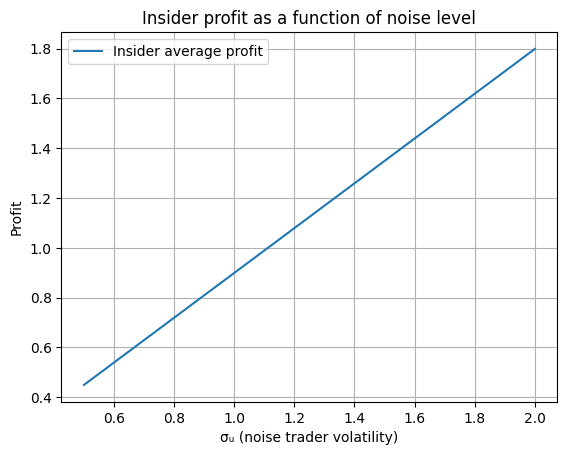

In [24]:
import matplotlib.pyplot as plt

# Range of noise trader standard deviations (σᵤ)
sigma_us = np.linspace(0.5, 2.0, 10)

# Lists to store results for each σᵤ
profits, sigmas, variances = [], [], []

# Run simulation for each σᵤ value
for su in sigma_us:
    avg_profit, Σ1, var1 = simulate_kyle_2period(1, su)  # σ_v fixed at 1
    profits.append(avg_profit)    # Insider's average profit
    sigmas.append(Σ1)             # Conditional variance after period 1
    variances.append(var1)        # Empirical variance of (v - p1)

# Plot insider profit vs. noise level
plt.plot(sigma_us, profits, label='Insider average profit')
plt.xlabel("σᵤ (noise trader volatility)")
plt.ylabel("Profit")
plt.title("Insider profit as a function of noise level")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Solve 3-period Kyle model using symbolic approach (backward)
def solve_kyle_3period(sigma_v, sigma_u):
    α1, α2, α3 = sp.symbols('α1 α2 α3', positive=True)
    σv2 = sigma_v**2
    σu2 = sigma_u**2

    # Step-by-step conditional variances
    Σ1 = 1 / (1/σv2 + α1**2 / σu2)
    Σ2 = 1 / (1/Σ1 + α2**2 / σu2)
    
    # λ_t formulas based on Kyle equilibrium conditions
    λ1 = α1 * σv2 / (α1**2 * σv2 + σu2)
    λ2 = α2 * Σ1 / (α2**2 * Σ1 + σu2)
    λ3 = α3 * Σ2 / (α3**2 * Σ2 + σu2)

    # Expected profits in each period
    A = α1 * σv2 * σu2 / (α1**2 * σv2 + σu2)
    c1 = σu2 / (α1**2 * σv2 + σu2)
    E_vP1 = c1**2 * σv2 + λ1**2 * σu2

    B = α2 * E_vP1 * (1 - α2 * λ2)
    c2 = σu2 / (α2**2 * Σ1 + σu2)
    E_vP2 = c2**2 * Σ1 + λ2**2 * σu2

    C = α3 * E_vP2 * (1 - α3 * λ3)

    total_profit = A + B + C

    # First-order conditions (derivatives of expected profit)
    d1 = sp.diff(total_profit, α1)
    d2 = sp.diff(total_profit, α2)
    d3 = sp.diff(total_profit, α3)

    # Solve numerically
    sol = sp.nsolve([d1, d2, d3], [α1, α2, α3], [0.5, 0.8, 1.2])
    return float(sol[0]), float(sol[1]), float(sol[2])

# Simulate trading and profit in 3-period Kyle model
def simulate_kyle_3period(sigma_v, sigma_u, N=10000):
    α1, α2, α3 = solve_kyle_3period(sigma_v, sigma_u)
    σv2 = sigma_v**2
    σu2 = sigma_u**2

    Σ0 = σv2
    Σ1 = 1 / (1/Σ0 + α1**2 / σu2)
    Σ2 = 1 / (1/Σ1 + α2**2 / σu2)

    λ1 = α1 * Σ0 / (α1**2 * Σ0 + σu2)
    λ2 = α2 * Σ1 / (α2**2 * Σ1 + σu2)
    λ3 = α3 * Σ2 / (α3**2 * Σ2 + σu2)

    rng = np.random.default_rng(0)
    v = rng.normal(0, sigma_v, N)

    # Period 1
    u1 = rng.normal(0, sigma_u, N)
    x1 = α1 * v
    y1 = x1 + u1
    p1 = λ1 * y1

    # Period 2
    u2 = rng.normal(0, sigma_u, N)
    x2 = α2 * (v - p1)
    y2 = x2 + u2
    p2 = p1 + λ2 * y2

    # Period 3
    u3 = rng.normal(0, sigma_u, N)
    x3 = α3 * (v - p2)
    y3 = x3 + u3
    p3 = p2 + λ3 * y3

    profit = (v - p1) * x1 + (v - p2) * x2 + (v - p3) * x3

    return {
        "alphas": (α1, α2, α3),
        "lambdas": (λ1, λ2, λ3),
        "variances": (Σ0, Σ1, Σ2),
        "profit_mean": np.mean(profit)
    }

# Run example simulation
results = simulate_kyle_3period(1, 1)
results

{'alphas': (0.6096239644159589, 0.8626792159182004, 1.4545985039066525),
 'lambdas': (0.4444485083332773, 0.4077209822672231, 0.3437374634011634),
 'variances': (1, 0.7290535383711081, 0.47262177498186464),
 'profit_mean': np.float64(1.1936739289511822)}

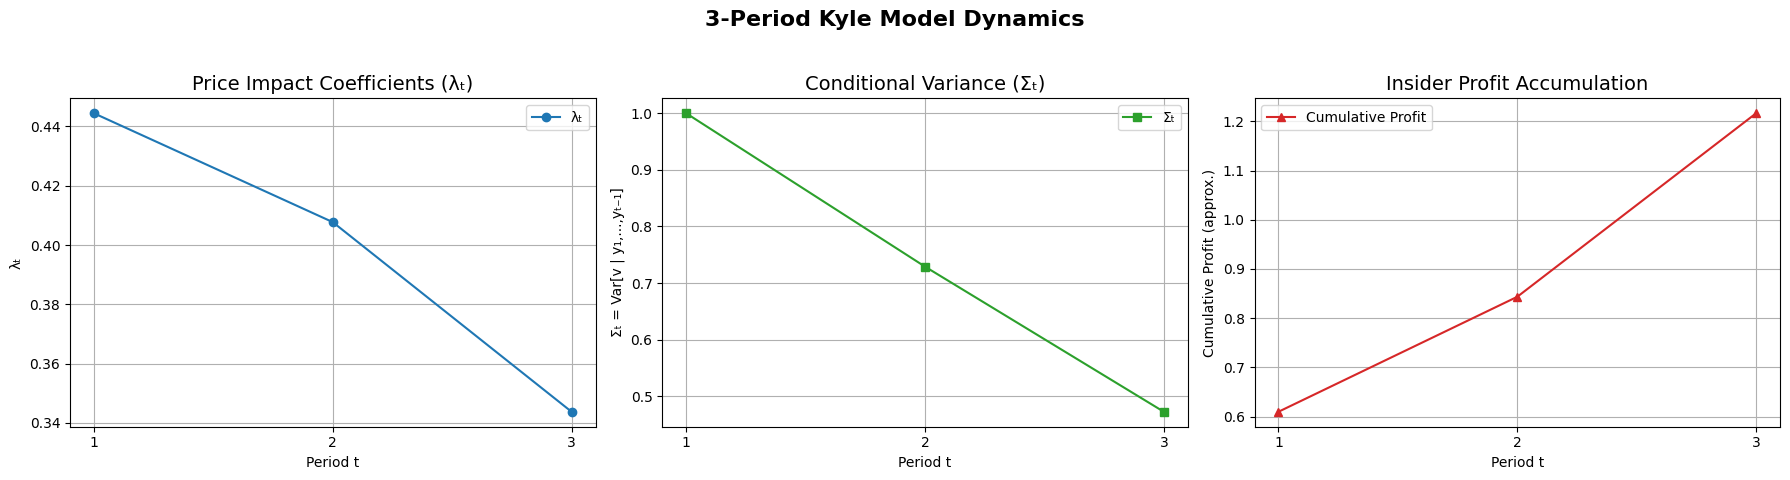

In [27]:
# Enhanced version of the 3 plots: unified style, colors, layout

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Define common period labels
periods = [1, 2, 3]

# Plot 1: λₜ (price impact)
axs[0].plot(periods, lambdas, marker='o', linestyle='-', color='tab:blue', label='λₜ')
axs[0].set_title("Price Impact Coefficients (λₜ)", fontsize=14)
axs[0].set_xlabel("Period t")
axs[0].set_ylabel("λₜ")
axs[0].grid(True)
axs[0].set_xticks(periods)
axs[0].legend()

# Plot 2: Σₜ (conditional variance)
axs[1].plot(periods, variances, marker='s', linestyle='-', color='tab:green', label='Σₜ')
axs[1].set_title("Conditional Variance (Σₜ)", fontsize=14)
axs[1].set_xlabel("Period t")
axs[1].set_ylabel("Σₜ = Var[v | y₁,...,yₜ₋₁]")
axs[1].grid(True)
axs[1].set_xticks(periods)
axs[1].legend()

# Plot 3: Cumulative insider profit (approx.)
profit_by_period = np.cumsum([
    alphas[0] * variances[0],
    alphas[1] * (variances[0] - variances[1]),
    alphas[2] * (variances[1] - variances[2])
])
axs[2].plot(periods, profit_by_period, marker='^', linestyle='-', color='tab:red', label='Cumulative Profit')
axs[2].set_title("Insider Profit Accumulation", fontsize=14)
axs[2].set_xlabel("Period t")
axs[2].set_ylabel("Cumulative Profit (approx.)")
axs[2].grid(True)
axs[2].set_xticks(periods)
axs[2].legend()

# Overall layout adjustments
plt.suptitle("3-Period Kyle Model Dynamics", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [28]:
import sympy as sp
import numpy as np

# FORWARD-LOOKING insider (standard optimal strategy, as before)
def solve_kyle_forward_3period(sigma_v, sigma_u):
    α1, α2, α3 = sp.symbols('α1 α2 α3', positive=True)
    σv2 = sigma_v**2
    σu2 = sigma_u**2

    Σ1 = 1 / (1/σv2 + α1**2 / σu2)
    Σ2 = 1 / (1/Σ1 + α2**2 / σu2)

    λ1 = α1 * σv2 / (α1**2 * σv2 + σu2)
    λ2 = α2 * Σ1 / (α2**2 * Σ1 + σu2)
    λ3 = α3 * Σ2 / (α3**2 * Σ2 + σu2)

    A = α1 * σv2 * σu2 / (α1**2 * σv2 + σu2)
    c1 = σu2 / (α1**2 * σv2 + σu2)
    E_vP1 = c1**2 * σv2 + λ1**2 * σu2

    B = α2 * E_vP1 * (1 - α2 * λ2)
    c2 = σu2 / (α2**2 * Σ1 + σu2)
    E_vP2 = c2**2 * Σ1 + λ2**2 * σu2

    C = α3 * E_vP2 * (1 - α3 * λ3)
    total_profit = A + B + C

    d1 = sp.diff(total_profit, α1)
    d2 = sp.diff(total_profit, α2)
    d3 = sp.diff(total_profit, α3)
    sol = sp.nsolve([d1, d2, d3], [α1, α2, α3], [0.5, 0.8, 1.2])
    return float(sol[0]), float(sol[1]), float(sol[2])

# MYOPIC insider: optimizes each period separately, ignoring future information revelation
def solve_kyle_myopic_3period(sigma_v, sigma_u):
    σv2 = sigma_v**2
    σu2 = sigma_u**2

    α1 = 1 / (2 * sigma_v / sigma_u)
    Σ1 = 1 / (1/σv2 + α1**2 / σu2)

    α2 = 1 / (2 * np.sqrt(Σ1) / sigma_u)
    Σ2 = 1 / (1/Σ1 + α2**2 / σu2)

    α3 = 1 / (2 * np.sqrt(Σ2) / sigma_u)

    return α1, α2, α3

# Compare both strategies numerically and return full comparison
def compare_strategies(sigma_v, sigma_u, N=10000):
    # Get α values
    αf1, αf2, αf3 = solve_kyle_forward_3period(sigma_v, sigma_u)
    αm1, αm2, αm3 = solve_kyle_myopic_3period(sigma_v, sigma_u)
    
    # Use shared simulation function
    def simulate_strategy(alphas):
        Σ0 = sigma_v**2
        Σ1 = 1 / (1/Σ0 + alphas[0]**2 / sigma_u**2)
        Σ2 = 1 / (1/Σ1 + alphas[1]**2 / sigma_u**2)

        λ1 = alphas[0] * Σ0 / (alphas[0]**2 * Σ0 + sigma_u**2)
        λ2 = alphas[1] * Σ1 / (alphas[1]**2 * Σ1 + sigma_u**2)
        λ3 = alphas[2] * Σ2 / (alphas[2]**2 * Σ2 + sigma_u**2)

        rng = np.random.default_rng(1)
        v = rng.normal(0, sigma_v, N)

        u1 = rng.normal(0, sigma_u, N)
        x1 = alphas[0] * v
        y1 = x1 + u1
        p1 = λ1 * y1

        u2 = rng.normal(0, sigma_u, N)
        x2 = alphas[1] * (v - p1)
        y2 = x2 + u2
        p2 = p1 + λ2 * y2

        u3 = rng.normal(0, sigma_u, N)
        x3 = alphas[2] * (v - p2)
        y3 = x3 + u3
        p3 = p2 + λ3 * y3

        profit = (v - p1) * x1 + (v - p2) * x2 + (v - p3) * x3
        return {
            "alphas": alphas,
            "lambdas": (λ1, λ2, λ3),
            "variances": (Σ0, Σ1, Σ2),
            "profit_mean": np.mean(profit)
        }

    forward = simulate_strategy((αf1, αf2, αf3))
    myopic = simulate_strategy((αm1, αm2, αm3))

    return {"forward": forward, "myopic": myopic}

# Run comparison for baseline parameters
comparison_result = compare_strategies(1, 1)
comparison_result


{'forward': {'alphas': (0.6096239644159589,
   0.8626792159182004,
   1.4545985039066525),
  'lambdas': (0.4444485083332773, 0.4077209822672231, 0.3437374634011634),
  'variances': (1, 0.7290535383711081, 0.47262177498186464),
  'profit_mean': np.float64(1.1491790950982723)},
 'myopic': {'alphas': (0.5, np.float64(0.5590169943749475), np.float64(0.625)),
  'lambdas': (0.4, np.float64(0.3577708763999664), np.float64(0.32)),
  'variances': (1, 0.8, np.float64(0.64)),
  'profit_mean': np.float64(1.0419519306953524)}}

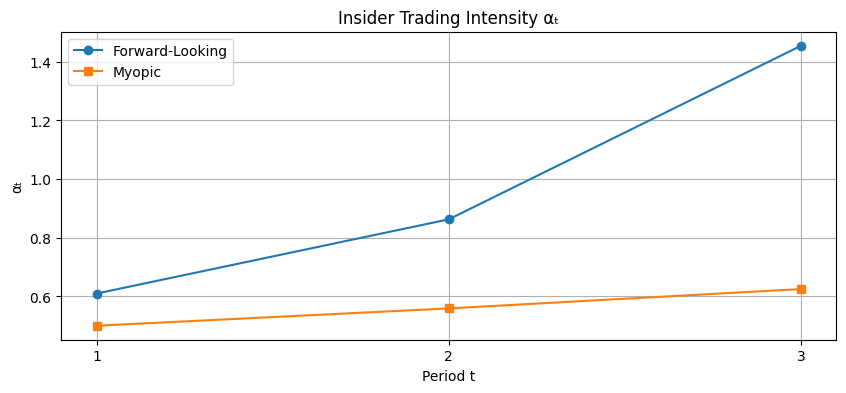

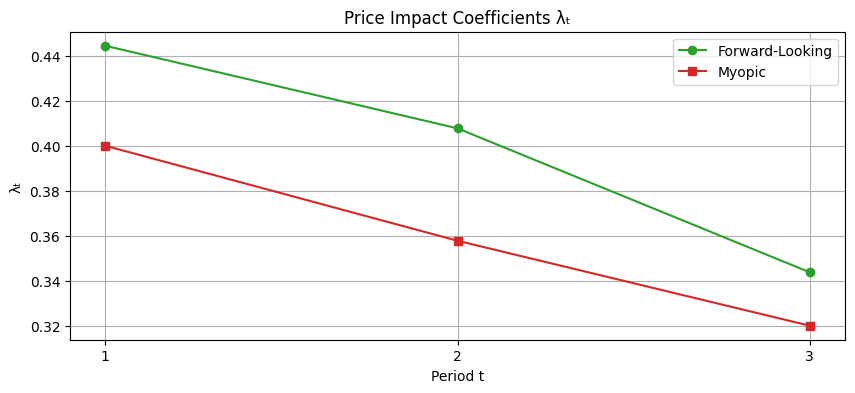

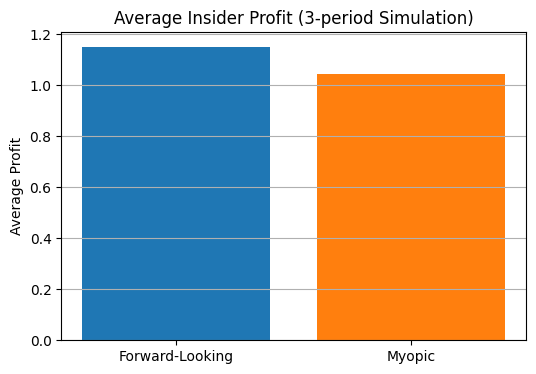

In [29]:
import matplotlib.pyplot as plt

# Extract values
periods = [1, 2, 3]
alphas_f = comparison_result["forward"]["alphas"]
alphas_m = comparison_result["myopic"]["alphas"]

lambdas_f = comparison_result["forward"]["lambdas"]
lambdas_m = comparison_result["myopic"]["lambdas"]

profits = [comparison_result["forward"]["profit_mean"],
           comparison_result["myopic"]["profit_mean"]]

# Plot alpha comparison
plt.figure(figsize=(10, 4))
plt.plot(periods, alphas_f, marker='o', label='Forward-Looking', color='tab:blue')
plt.plot(periods, alphas_m, marker='s', label='Myopic', color='tab:orange')
plt.title("Insider Trading Intensity αₜ")
plt.xlabel("Period t")
plt.ylabel("αₜ")
plt.xticks(periods)
plt.grid(True)
plt.legend()
plt.show()

# Plot lambda comparison
plt.figure(figsize=(10, 4))
plt.plot(periods, lambdas_f, marker='o', label='Forward-Looking', color='tab:green')
plt.plot(periods, lambdas_m, marker='s', label='Myopic', color='tab:red')
plt.title("Price Impact Coefficients λₜ")
plt.xlabel("Period t")
plt.ylabel("λₜ")
plt.xticks(periods)
plt.grid(True)
plt.legend()
plt.show()

# Bar plot of average profit
plt.figure(figsize=(6, 4))
plt.bar(['Forward-Looking', 'Myopic'], profits, color=['tab:blue', 'tab:orange'])
plt.title("Average Insider Profit (3-period Simulation)")
plt.ylabel("Average Profit")
plt.grid(axis='y')
plt.show()

In [30]:
# Solve single-period Kyle model with noisy signal: s = v + ε
def solve_kyle_noisy_signal(sigma_v, sigma_u, sigma_e):
    # Total uncertainty from insider's perspective: Var[v | s]
    sigma_s2 = sigma_v**2 + sigma_e**2

    # Equilibrium alpha: insider reacts to signal s
    alpha = 1 / (2 * (sigma_s2 / sigma_u))
    
    # Effective variance of order flow
    var_y = alpha**2 * sigma_s2 + sigma_u**2

    # Market maker infers v from y (knowing insider used signal s)
    lambda_ = alpha * sigma_s2 / var_y

    return alpha, lambda_

# Simulate T=1 profit for noisy signal case
def simulate_kyle_noisy_signal(sigma_v, sigma_u, sigma_e, N=10000):
    alpha, lambda_ = solve_kyle_noisy_signal(sigma_v, sigma_u, sigma_e)
    rng = np.random.default_rng(42)
    v = rng.normal(0, sigma_v, N)
    eps = rng.normal(0, sigma_e, N)
    s = v + eps
    x = alpha * s
    u = rng.normal(0, sigma_u, N)
    y = x + u
    p = lambda_ * y
    profit = (v - p) * x
    return {
        "alpha": alpha,
        "lambda": lambda_,
        "mean_profit": np.mean(profit),
        "std_profit": np.std(profit)
    }

# Run simulation for different epsilon levels
results_noisy = []
sigma_epsilons = np.linspace(0.0, 2.0, 10)  # from perfect info to very noisy
for sigma_e in sigma_epsilons:
    result = simulate_kyle_noisy_signal(1, 1, sigma_e)
    result["sigma_e"] = sigma_e
    results_noisy.append(result)

results_noisy

[{'alpha': np.float64(0.5),
  'lambda': np.float64(0.4),
  'mean_profit': np.float64(0.4064934923880702),
  'std_profit': np.float64(0.6207974705426009),
  'sigma_e': np.float64(0.0)},
 {'alpha': np.float64(0.47647058823529415),
  'lambda': np.float64(0.40380047505938244),
  'mean_profit': np.float64(0.3861726871918745),
  'std_profit': np.float64(0.6012419930877887),
  'sigma_e': np.float64(0.2222222222222222)},
 {'alpha': np.float64(0.4175257731958763),
  'lambda': np.float64(0.41364605543710015),
  'mean_profit': np.float64(0.33606384160171393),
  'std_profit': np.float64(0.553766478166411),
  'sigma_e': np.float64(0.4444444444444444)},
 {'alpha': np.float64(0.34615384615384615),
  'lambda': np.float64(0.4262295081967213),
  'mean_profit': np.float64(0.2761395121577385),
  'std_profit': np.float64(0.4952714741945301),
  'sigma_e': np.float64(0.6666666666666666)},
 {'alpha': np.float64(0.2793103448275862),
  'lambda': np.float64(0.43872919818456885),
  'mean_profit': np.float64(0.220

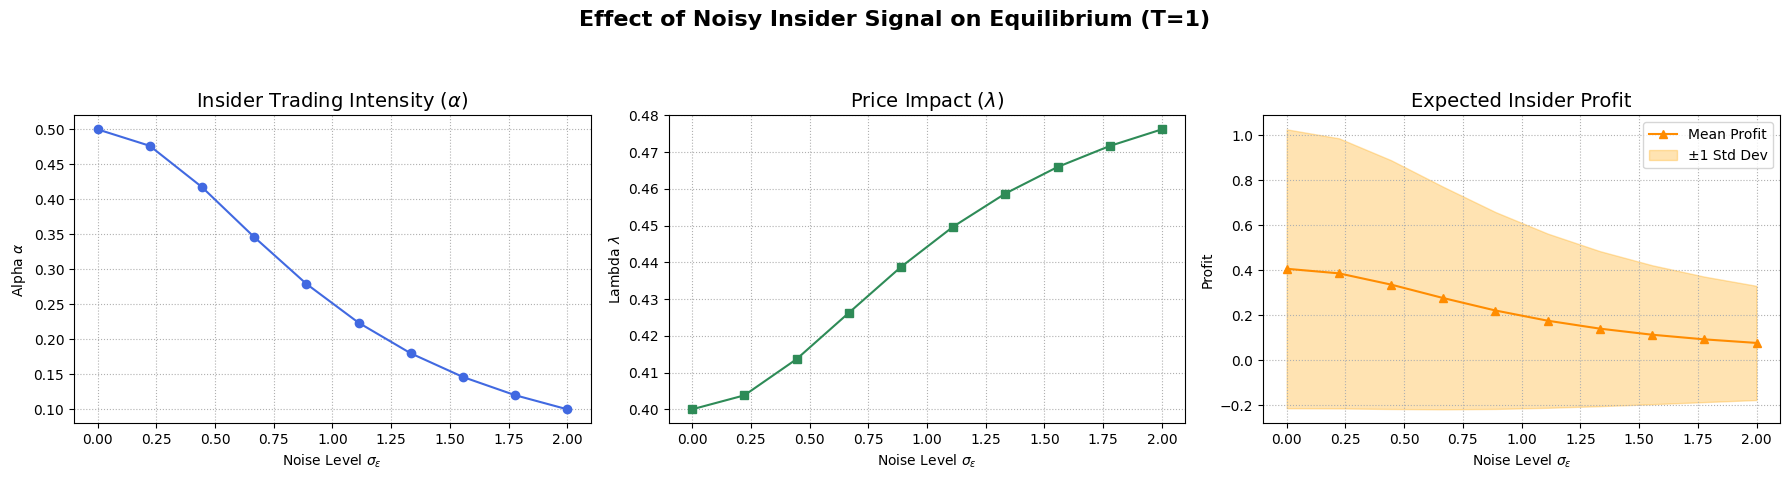

In [31]:
# Prepare data for plotting
sigma_eps = [r["sigma_e"] for r in results_noisy]
alphas = [r["alpha"] for r in results_noisy]
lambdas = [r["lambda"] for r in results_noisy]
profits = [r["mean_profit"] for r in results_noisy]
stds = [r["std_profit"] for r in results_noisy]

# Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# α vs σ_ε
axs[0].plot(sigma_eps, alphas, marker='o', color='royalblue')
axs[0].set_title("Insider Trading Intensity ($\\alpha$)", fontsize=14)
axs[0].set_xlabel("Noise Level $\\sigma_\\varepsilon$")
axs[0].set_ylabel("Alpha $\\alpha$")
axs[0].grid(True, linestyle=':')

# λ vs σ_ε
axs[1].plot(sigma_eps, lambdas, marker='s', color='seagreen')
axs[1].set_title("Price Impact ($\\lambda$)", fontsize=14)
axs[1].set_xlabel("Noise Level $\\sigma_\\varepsilon$")
axs[1].set_ylabel("Lambda $\\lambda$")
axs[1].grid(True, linestyle=':')

# Profit vs σ_ε
axs[2].plot(sigma_eps, profits, marker='^', linestyle='-', color='darkorange', label='Mean Profit')
axs[2].fill_between(sigma_eps,
                    [m - s for m, s in zip(profits, stds)],
                    [m + s for m, s in zip(profits, stds)],
                    color='orange', alpha=0.3, label='±1 Std Dev')
axs[2].set_title("Expected Insider Profit", fontsize=14)
axs[2].set_xlabel("Noise Level $\\sigma_\\varepsilon$")
axs[2].set_ylabel("Profit")
axs[2].grid(True, linestyle=':')
axs[2].legend()

# Layout
plt.suptitle("Effect of Noisy Insider Signal on Equilibrium (T=1)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()


In [32]:
# 3-period Kyle model with noisy signal s = v + ε

def solve_kyle_3period_noisy(sigma_v, sigma_u, sigma_e):
    # Step 1: insider's perceived variance (signal-based)
    sigma_s2 = sigma_v**2 + sigma_e**2

    # Use simplified version of alpha_t = 1 / (2 * (Var_est / sigma_u))
    alpha1 = 1 / (2 * (sigma_s2 / sigma_u))
    Sigma1 = 1 / (1 / sigma_v**2 + alpha1**2 / sigma_u**2)

    alpha2 = 1 / (2 * (Sigma1 + sigma_e**2) / sigma_u)
    Sigma2 = 1 / (1 / Sigma1 + alpha2**2 / sigma_u**2)

    alpha3 = 1 / (2 * (Sigma2 + sigma_e**2) / sigma_u)

    return alpha1, alpha2, alpha3

# Simulate noisy signal T=3 model
def simulate_kyle_3period_noisy(sigma_v, sigma_u, sigma_e, N=10000):
    alphas = solve_kyle_3period_noisy(sigma_v, sigma_u, sigma_e)

    sigma_s2 = sigma_v**2 + sigma_e**2

    Sigma0 = sigma_v**2
    Sigma1 = 1 / (1 / Sigma0 + alphas[0]**2 / sigma_u**2)
    Sigma2 = 1 / (1 / Sigma1 + alphas[1]**2 / sigma_u**2)

    lambda1 = alphas[0] * sigma_s2 / (alphas[0]**2 * sigma_s2 + sigma_u**2)
    lambda2 = alphas[1] * (Sigma1 + sigma_e**2) / (alphas[1]**2 * (Sigma1 + sigma_e**2) + sigma_u**2)
    lambda3 = alphas[2] * (Sigma2 + sigma_e**2) / (alphas[2]**2 * (Sigma2 + sigma_e**2) + sigma_u**2)

    rng = np.random.default_rng(42)
    v = rng.normal(0, sigma_v, N)
    eps = rng.normal(0, sigma_e, N)
    s = v + eps  # insider's noisy signal

    u1 = rng.normal(0, sigma_u, N)
    x1 = alphas[0] * s
    y1 = x1 + u1
    p1 = lambda1 * y1

    u2 = rng.normal(0, sigma_u, N)
    x2 = alphas[1] * (s - p1)
    y2 = x2 + u2
    p2 = p1 + lambda2 * y2

    u3 = rng.normal(0, sigma_u, N)
    x3 = alphas[2] * (s - p2)
    y3 = x3 + u3
    p3 = p2 + lambda3 * y3

    profit = (v - p1) * x1 + (v - p2) * x2 + (v - p3) * x3
    return {
        "alphas": alphas,
        "lambdas": (lambda1, lambda2, lambda3),
        "variances": (Sigma0, Sigma1, Sigma2),
        "mean_profit": np.mean(profit),
        "std_profit": np.std(profit)
    }

# Run for different levels of signal noise
sigma_epsilons = np.linspace(0.0, 2.0, 10)
results_noisy_3period = []

for sigma_e in sigma_epsilons:
    res = simulate_kyle_3period_noisy(1, 1, sigma_e)
    res["sigma_e"] = sigma_e
    results_noisy_3period.append(res)

results_noisy_3period


[{'alphas': (np.float64(0.5),
   np.float64(0.625),
   np.float64(0.8203124999999999)),
  'lambdas': (np.float64(0.4),
   np.float64(0.38095238095238093),
   np.float64(0.3545706371191136)),
  'variances': (1, np.float64(0.8), np.float64(0.6095238095238096)),
  'mean_profit': np.float64(1.1544387076275244),
  'std_profit': np.float64(1.66666682230774),
  'sigma_e': np.float64(0.0)},
 {'alphas': (np.float64(0.47647058823529415),
   np.float64(0.5784609689923729),
   np.float64(0.7249164827889164)),
  'lambdas': (np.float64(0.40380047505938244),
   np.float64(0.38782824794543475),
   np.float64(0.3669837245714456)),
  'variances': (1,
   np.float64(0.8149798370040326),
   np.float64(0.6403519111402044)),
  'mean_profit': np.float64(1.084317955867006),
  'std_profit': np.float64(1.604309353354181),
  'sigma_e': np.float64(0.2222222222222222)},
 {'alphas': (np.float64(0.4175257731958763),
   np.float64(0.4766072240677291),
   np.float64(0.5488105850722542)),
  'lambdas': (np.float64(0.4136

In [40]:
import pandas as pd

# Create summary DataFrame from results
table_data = {
    "σ_ε": [],
    "α₁": [],
    "α₂": [],
    "α₃": [],
    "λ₁": [],
    "λ₃": [],
    "Mean Profit": [],
    "Std. Dev": []
}

for r in results_noisy_3period:
    table_data["σ_ε"].append(round(r["sigma_e"], 2))
    table_data["α₁"].append(round(r["alphas"][0], 3))
    table_data["α₂"].append(round(r["alphas"][1], 3))
    table_data["α₃"].append(round(r["alphas"][2], 3))
    table_data["λ₁"].append(round(r["lambdas"][0], 3))
    table_data["λ₃"].append(round(r["lambdas"][2], 3))
    table_data["Mean Profit"].append(round(r["mean_profit"], 3))
    table_data["Std. Dev"].append(round(r["std_profit"], 3))

df_summary = pd.DataFrame(table_data)

# Display table
print(df_summary.to_string(index=False))

 σ_ε    α₁    α₂    α₃    λ₁    λ₃  Mean Profit  Std. Dev
0.00 0.500 0.625 0.820 0.400 0.355        1.154     1.667
0.22 0.476 0.578 0.725 0.404 0.367        1.084     1.604
0.44 0.418 0.477 0.549 0.414 0.392        0.926     1.465
0.67 0.346 0.374 0.404 0.426 0.416        0.756     1.314
0.89 0.279 0.291 0.303 0.439 0.434        0.607     1.179
1.11 0.224 0.229 0.233 0.450 0.448        0.487     1.064
1.33 0.180 0.182 0.184 0.459 0.458        0.394     0.966
1.56 0.146 0.147 0.148 0.466 0.466        0.322     0.882
1.78 0.120 0.121 0.121 0.472 0.471        0.265     0.809
2.00 0.100 0.100 0.100 0.476 0.476        0.222     0.745


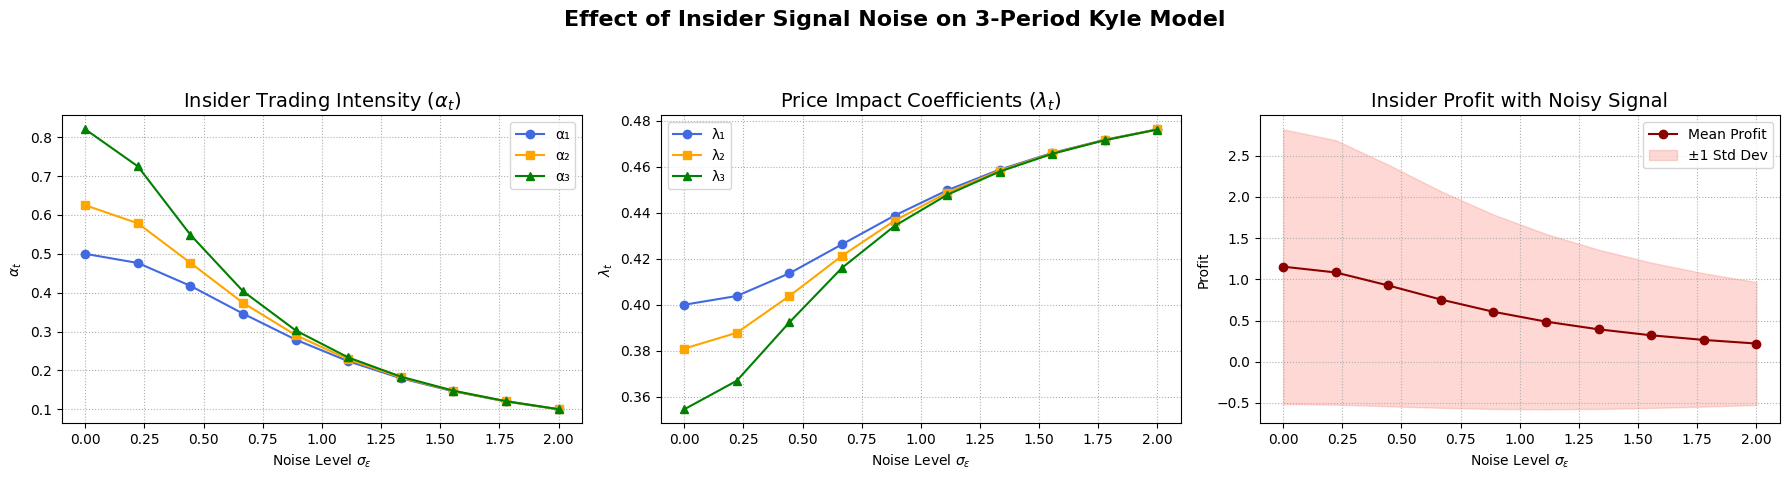

In [41]:
# Extract values for plotting
sigma_eps = [r["sigma_e"] for r in results_noisy_3period]
alphas_all = [r["alphas"] for r in results_noisy_3period]
lambdas_all = [r["lambdas"] for r in results_noisy_3period]
profits = [r["mean_profit"] for r in results_noisy_3period]
stds = [r["std_profit"] for r in results_noisy_3period]

# Unpack alpha and lambda by period
alpha1 = [a[0] for a in alphas_all]
alpha2 = [a[1] for a in alphas_all]
alpha3 = [a[2] for a in alphas_all]

lambda1 = [l[0] for l in lambdas_all]
lambda2 = [l[1] for l in lambdas_all]
lambda3 = [l[2] for l in lambdas_all]

# Plot α₁, α₂, α₃ vs σ_ε
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(sigma_eps, alpha1, marker='o', color='royalblue', label='α₁')
axs[0].plot(sigma_eps, alpha2, marker='s', color='orange', label='α₂')
axs[0].plot(sigma_eps, alpha3, marker='^', color='green', label='α₃')
axs[0].set_title("Insider Trading Intensity ($\\alpha_t$)", fontsize=14)
axs[0].set_xlabel("Noise Level $\\sigma_\\varepsilon$")
axs[0].set_ylabel("$\\alpha_t$")
axs[0].grid(True, linestyle=':')
axs[0].legend()

# Plot λ₁, λ₂, λ₃ vs σ_ε
axs[1].plot(sigma_eps, lambda1, marker='o', color='royalblue', label='λ₁')
axs[1].plot(sigma_eps, lambda2, marker='s', color='orange', label='λ₂')
axs[1].plot(sigma_eps, lambda3, marker='^', color='green', label='λ₃')
axs[1].set_title("Price Impact Coefficients ($\\lambda_t$)", fontsize=14)
axs[1].set_xlabel("Noise Level $\\sigma_\\varepsilon$")
axs[1].set_ylabel("$\\lambda_t$")
axs[1].grid(True, linestyle=':')
axs[1].legend()

# Plot Profit ± 1 Std Dev
axs[2].plot(sigma_eps, profits, marker='o', linestyle='-', color='darkred', label='Mean Profit')
axs[2].fill_between(sigma_eps,
                    [m - s for m, s in zip(profits, stds)],
                    [m + s for m, s in zip(profits, stds)],
                    color='salmon', alpha=0.3, label='±1 Std Dev')
axs[2].set_title("Insider Profit with Noisy Signal", fontsize=14)
axs[2].set_xlabel("Noise Level $\\sigma_\\varepsilon$")
axs[2].set_ylabel("Profit")
axs[2].grid(True, linestyle=':')
axs[2].legend()

# Layout adjustments
plt.suptitle("Effect of Insider Signal Noise on 3-Period Kyle Model", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()

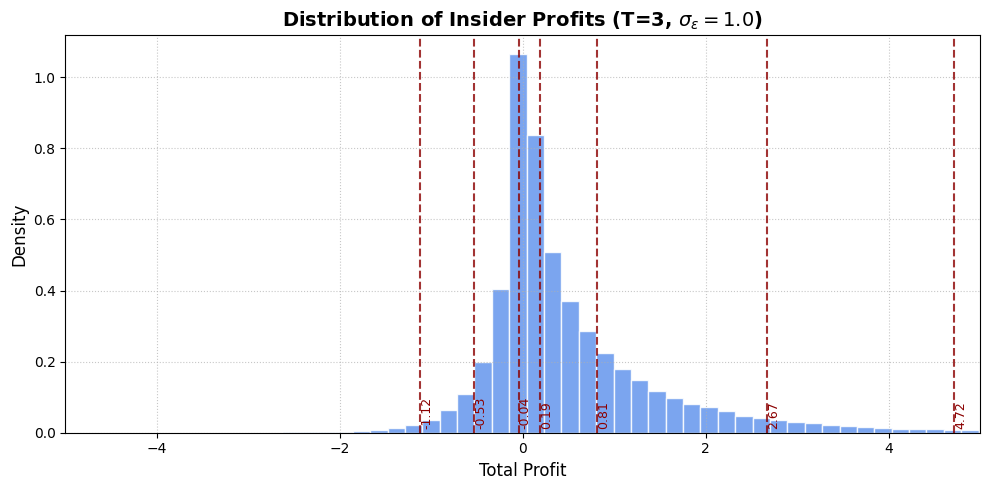

In [43]:
# Choose a specific noise level for detailed distribution analysis
sigma_e_test = 1.0  # moderate noise
distribution_result = simulate_kyle_3period_noisy(1, 1, sigma_e_test, N=100000)

# Re-run with stored profit array for full distribution
def simulate_kyle_3period_noisy_full_profit(sigma_v, sigma_u, sigma_e, N=100000):
    alphas = solve_kyle_3period_noisy(sigma_v, sigma_u, sigma_e)
    sigma_s2 = sigma_v**2 + sigma_e**2
    Sigma0 = sigma_v**2
    Sigma1 = 1 / (1 / Sigma0 + alphas[0]**2 / sigma_u**2)
    Sigma2 = 1 / (1 / Sigma1 + alphas[1]**2 / sigma_u**2)

    lambda1 = alphas[0] * sigma_s2 / (alphas[0]**2 * sigma_s2 + sigma_u**2)
    lambda2 = alphas[1] * (Sigma1 + sigma_e**2) / (alphas[1]**2 * (Sigma1 + sigma_e**2) + sigma_u**2)
    lambda3 = alphas[2] * (Sigma2 + sigma_e**2) / (alphas[2]**2 * (Sigma2 + sigma_e**2) + sigma_u**2)

    rng = np.random.default_rng(123)
    v = rng.normal(0, sigma_v, N)
    eps = rng.normal(0, sigma_e, N)
    s = v + eps

    u1 = rng.normal(0, sigma_u, N)
    x1 = alphas[0] * s
    y1 = x1 + u1
    p1 = lambda1 * y1

    u2 = rng.normal(0, sigma_u, N)
    x2 = alphas[1] * (s - p1)
    y2 = x2 + u2
    p2 = p1 + lambda2 * y2

    u3 = rng.normal(0, sigma_u, N)
    x3 = alphas[2] * (s - p2)
    y3 = x3 + u3
    p3 = p2 + lambda3 * y3

    profit = (v - p1) * x1 + (v - p2) * x2 + (v - p3) * x3
    return profit

# Simulate and compute distribution
profits_full = simulate_kyle_3period_noisy_full_profit(1, 1, sigma_e_test)

# Redraw the histogram with professional styling and limited x-axis
plt.figure(figsize=(10, 5))
plt.hist(profits_full, bins=100, density=True, color='cornflowerblue', alpha=0.85, edgecolor='white')

# Add percentile lines with labels
for p in percentiles:
    plt.axvline(p, color='darkred', linestyle='--', alpha=0.8)
    plt.text(p, 0.01, f'{p:.2f}', rotation=90, verticalalignment='bottom', color='darkred', fontsize=9)

plt.title("Distribution of Insider Profits (T=3, $\\sigma_\\varepsilon = 1.0$)", fontsize=14, fontweight='bold')
plt.xlabel("Total Profit", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xlim(-5, 5)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


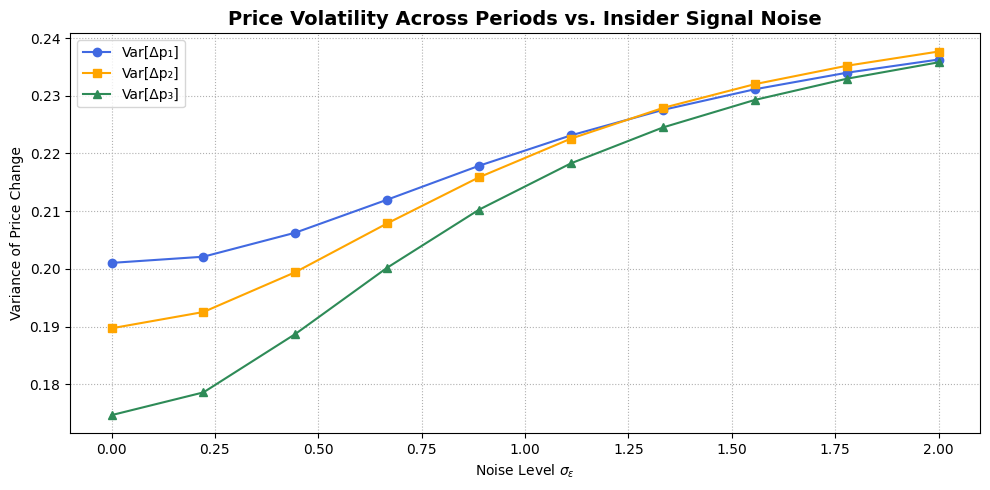

In [44]:
# Simulate full price paths for volatility analysis across different σ_ε
def simulate_price_volatility(sigma_v, sigma_u, sigma_e, N=10000):
    alphas = solve_kyle_3period_noisy(sigma_v, sigma_u, sigma_e)
    sigma_s2 = sigma_v**2 + sigma_e**2
    Sigma0 = sigma_v**2
    Sigma1 = 1 / (1 / Sigma0 + alphas[0]**2 / sigma_u**2)
    Sigma2 = 1 / (1 / Sigma1 + alphas[1]**2 / sigma_u**2)

    lambda1 = alphas[0] * sigma_s2 / (alphas[0]**2 * sigma_s2 + sigma_u**2)
    lambda2 = alphas[1] * (Sigma1 + sigma_e**2) / (alphas[1]**2 * (Sigma1 + sigma_e**2) + sigma_u**2)
    lambda3 = alphas[2] * (Sigma2 + sigma_e**2) / (alphas[2]**2 * (Sigma2 + sigma_e**2) + sigma_u**2)

    rng = np.random.default_rng(7)
    v = rng.normal(0, sigma_v, N)
    eps = rng.normal(0, sigma_e, N)
    s = v + eps

    u1 = rng.normal(0, sigma_u, N)
    x1 = alphas[0] * s
    y1 = x1 + u1
    p1 = lambda1 * y1

    u2 = rng.normal(0, sigma_u, N)
    x2 = alphas[1] * (s - p1)
    y2 = x2 + u2
    p2 = p1 + lambda2 * y2

    u3 = rng.normal(0, sigma_u, N)
    x3 = alphas[2] * (s - p2)
    y3 = x3 + u3
    p3 = p2 + lambda3 * y3

    dp1 = p1  # since p0 = 0
    dp2 = p2 - p1
    dp3 = p3 - p2

    return np.var(dp1), np.var(dp2), np.var(dp3)

# Run across sigma_epsilon values
volatility_results = []
for sigma_e in sigma_epsilons:
    var1, var2, var3 = simulate_price_volatility(1, 1, sigma_e)
    volatility_results.append({
        "sigma_e": sigma_e,
        "Var[Δp₁]": var1,
        "Var[Δp₂]": var2,
        "Var[Δp₃]": var3
    })

# Prepare for plotting
var1_list = [r["Var[Δp₁]"] for r in volatility_results]
var2_list = [r["Var[Δp₂]"] for r in volatility_results]
var3_list = [r["Var[Δp₃]"] for r in volatility_results]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sigma_epsilons, var1_list, marker='o', label='Var[Δp₁]', color='royalblue')
plt.plot(sigma_epsilons, var2_list, marker='s', label='Var[Δp₂]', color='orange')
plt.plot(sigma_epsilons, var3_list, marker='^', label='Var[Δp₃]', color='seagreen')
plt.title("Price Volatility Across Periods vs. Insider Signal Noise", fontsize=14, fontweight='bold')
plt.xlabel("Noise Level $\\sigma_\\varepsilon$")
plt.ylabel("Variance of Price Change")
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()
